In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from const import cgs
from gen import gen_tab, gen_inv_tab, cmap_gam, get_cmap_mmw
from scipy.interpolate import RegularGridInterpolator

mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["font.size"] = 12
mpl.rcParams.update({
    "text.usetex": True,   
    "font.family": "serif",
    "font.serif": ["Times"],
    "mathtext.fontset": "stix",
})


In [6]:
Y = 0.3         # Helium mass fraction
jmax = 16       # number of rotational modes of H2
rad = True      # whether to include radiation contribution
do_print = True # print as each row of table is computed
cmap_mmw = get_cmap_mmw(Y)

#rho = np.logspace(-20, 2, 881)
#temp = np.logspace(0, 10, 1001)
#rho = np.logspace(-20, 2, 111)
#temp = np.logspace(0, 10, 126)

tab = gen_tab(rho, temp, Y=Y, jmax=jmax, rad=rad)


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,

Text(0.05, 0.28, 'rotational degrees not excited')

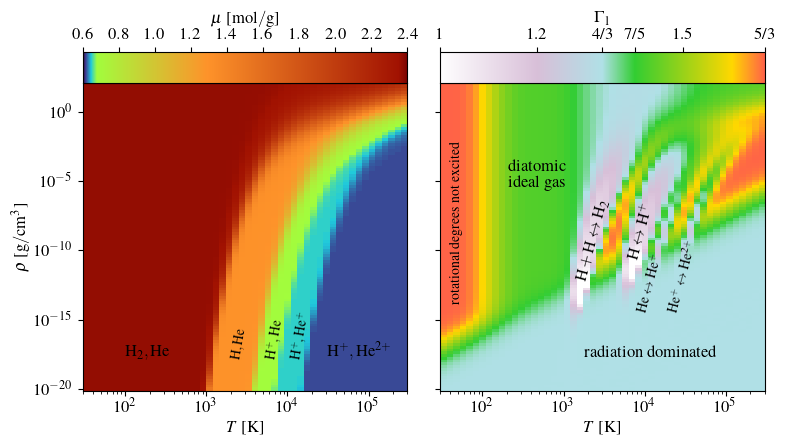

In [49]:
fig, axs = plt.subplots(figsize=(8.8, 4), ncols=2, sharex=True, sharey=True)
plt.subplots_adjust(hspace=1e-3, wspace=0.1)

im1 = axs[0].pcolormesh(np.exp(tab.log_temp), np.exp(tab.log_rho), tab.mmw, vmin=0.6, vmax=2.4, cmap=cmap_mmw)
im2 = axs[1].pcolormesh(np.exp(tab.log_temp), np.exp(tab.log_rho), tab.gam1, vmin=1.0, vmax=5/3, cmap=cmap_gam)

axs[0].set_xscale("log")
axs[1].set_xscale("log")
axs[0].set_yscale("log")

cax = axs[0].inset_axes([0, 1, 1, 0.1])
cbar = plt.colorbar(im1, cax=cax, orientation="horizontal")
cbar.set_label(r"$\mu$ [${\rm mol/g}$]")
cbar.set_ticks([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
cax.xaxis.set_label_position('top')
cax.xaxis.set_ticks_position('top')

cax = axs[1].inset_axes([0, 1, 1, 0.1])
cbar = plt.colorbar(im2, cax=cax, orientation="horizontal")
cbar.set_label(r"$\Gamma_1$")
cbar.set_ticks([1, 1.2, 4/3, 1.4, 1.5, 5/3])
cbar.set_ticklabels(["1", "1.2", "4/3", "7/5", "1.5", "5/3"])
cax.xaxis.set_label_position('top')
cax.xaxis.set_ticks_position('top')

axs[0].set_xticks([1e2, 1e3, 1e4, 1e5])
axs[0].set_yticks([1e-20, 1e-15, 1e-10, 1e-5, 1e0]);
axs[0].set_xlim(3e1, 3e5)

axs[0].set_ylabel(r"$\rho$ [${\rm g/cm^3}$]")
axs[0].set_xlabel(r"$T$ [${\rm K}$]")
axs[1].set_xlabel(r"$T$ [${\rm K}$]")

axs[0].annotate(r"${\rm H_2}, {\rm He}$", (0.2, 0.1), xycoords="axes fraction", ha="center", va="bottom", fontsize=12, rotation=0)
axs[0].annotate(r"${\rm H}, {\rm He}$", (0.48, 0.1), xycoords="axes fraction", ha="center", va="bottom", fontsize=10, rotation=80)
axs[0].annotate(r"${\rm H^+}, {\rm He}$", (0.59, 0.1), xycoords="axes fraction", ha="center", va="bottom", fontsize=10, rotation=80)
axs[0].annotate(r"${\rm H^+}, {\rm He^+}$", (0.67, 0.1), xycoords="axes fraction", ha="center", va="bottom", fontsize=10, rotation=80)
axs[0].annotate(r"${\rm H^+}, {\rm He^{2+}}$", (0.85, 0.1), xycoords="axes fraction", ha="center", va="bottom", fontsize=12, rotation=0)

axs[1].annotate(r"${\rm H} + {\rm H} \leftrightarrow {\rm H_2}$", (0.47, 0.35), xycoords="axes fraction", ha="center", va="bottom", fontsize=12, rotation=75)
axs[1].annotate(r"${\rm H} \leftrightarrow {\rm H^+}$", (0.62, 0.42), xycoords="axes fraction", ha="center", va="bottom", fontsize=12, rotation=75)
axs[1].annotate(r"${\rm He} \leftrightarrow {\rm He^+}$", (0.65, 0.25), xycoords="axes fraction", ha="center", va="bottom", fontsize=10, rotation=75)
axs[1].annotate(r"${\rm He^+} \leftrightarrow {\rm He^{2+}}$", (0.75, 0.25), xycoords="axes fraction", ha="center", va="bottom", fontsize=10, rotation=75)
axs[1].annotate(r"radiation dominated", (0.65, 0.1), xycoords="axes fraction", ha="center", va="bottom", fontsize=12, rotation=0)
axs[1].annotate("diatomic\n ideal gas", (0.3, 0.65), xycoords="axes fraction", ha="center", va="bottom", fontsize=12, rotation=0)
axs[1].annotate("rotational degrees not excited", (0.05, 0.28), xycoords="axes fraction", ha="center", va="bottom", fontsize=10, rotation=90)


In [45]:
# por = np.linspace(7.56, 23.40, 1585)
# eps = np.logspace(7.74, 23.86, 1613)
por = np.logspace(7.6, 23.4, 159)
eps = np.logspace(7.8, 23.8, 161)

tab_inv1, tab_inv2 = gen_inv_tab(tab, rho, por, eps, Y=Y)


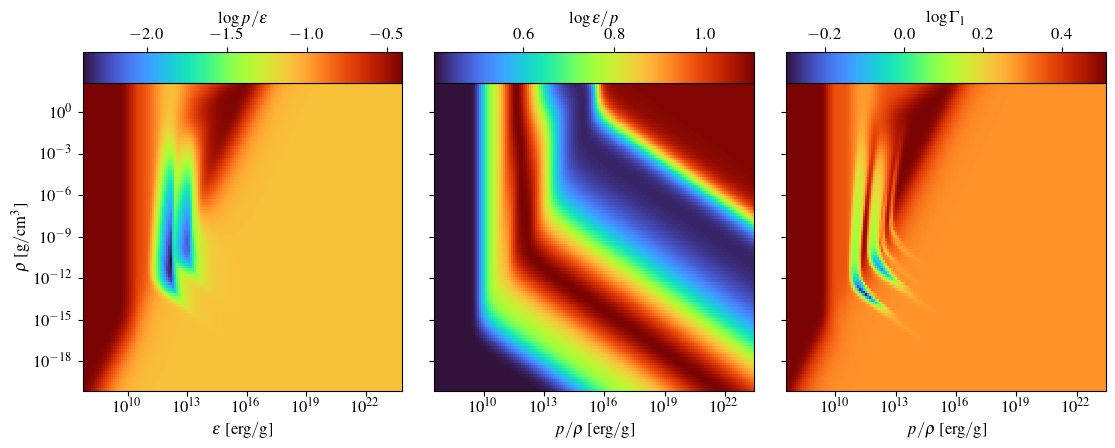

In [79]:
fig, axs = plt.subplots(figsize=(13.2, 4), ncols=3, sharey=True)
plt.subplots_adjust(hspace=1e-3, wspace=0.1)

im0 = axs[0].pcolormesh(np.exp(tab_inv1.log_eps), np.exp(tab_inv1.log_rho), tab_inv1.log_poe, cmap="turbo")
im1 = axs[1].pcolormesh(np.exp(tab_inv2.log_por), np.exp(tab_inv2.log_rho), tab_inv2.log_eop, cmap="turbo")
im2 = axs[2].pcolormesh(np.exp(tab_inv2.log_por), np.exp(tab_inv2.log_rho), tab_inv2.log_gam1, cmap="turbo")

axs[0].set_xscale("log")
axs[1].set_xscale("log")
axs[2].set_xscale("log")
axs[0].set_yscale("log")

axs[0].set_xlabel(r"$\varepsilon$ [${\rm erg/g}$]")
axs[1].set_xlabel(r"$p/\rho$ [${\rm erg/g}$]")
axs[2].set_xlabel(r"$p/\rho$ [${\rm erg/g}$]")
axs[0].set_ylabel(r"$\rho$ [${\rm g/cm^3}$]")

cax0 = axs[0].inset_axes([0, 1, 1, 0.1])
cax1 = axs[1].inset_axes([0, 1, 1, 0.1])
cax2 = axs[2].inset_axes([0, 1, 1, 0.1])

cbar0 = plt.colorbar(im0, cax=cax0, orientation="horizontal")
cbar1 = plt.colorbar(im1, cax=cax1, orientation="horizontal")
cbar2 = plt.colorbar(im2, cax=cax2, orientation="horizontal")

cbar0.set_label(r"$\log p/\varepsilon$")
cbar1.set_label(r"$\log \varepsilon/p$")
cbar2.set_label(r"$\log \Gamma_1$")

cax0.xaxis.set_ticks_position('top')
cax1.xaxis.set_ticks_position('top')
cax2.xaxis.set_ticks_position('top')

cax0.xaxis.set_label_position('top')
cax1.xaxis.set_label_position('top')
cax2.xaxis.set_label_position('top')
